Classifier comparison

🔄 Загружаем данные Titanic...
📊 Исходный размер: 1309x28
🧹 Очищаем данные...
🎯 Выбираем признаки: Age, Fare
✂️ Делим данные: 60%/40%...
📈 Размер: 1307 пассажиров
❤️ Выживаемость: 26.01%
📊 Обучение/Тест: 784/523
🔴 Погибло: 967 (74.0%)
🟢 Выжило: 340 (26.0%)

📊 Строим графики...
   Обучаем Random Forest (Улучшенный)...

🌟 ВАЖНОСТЬ ПРИЗНАКОВ (Random Forest):
  Age       : 0.377 (37.7%)
  Fare      : 0.623 (62.3%)


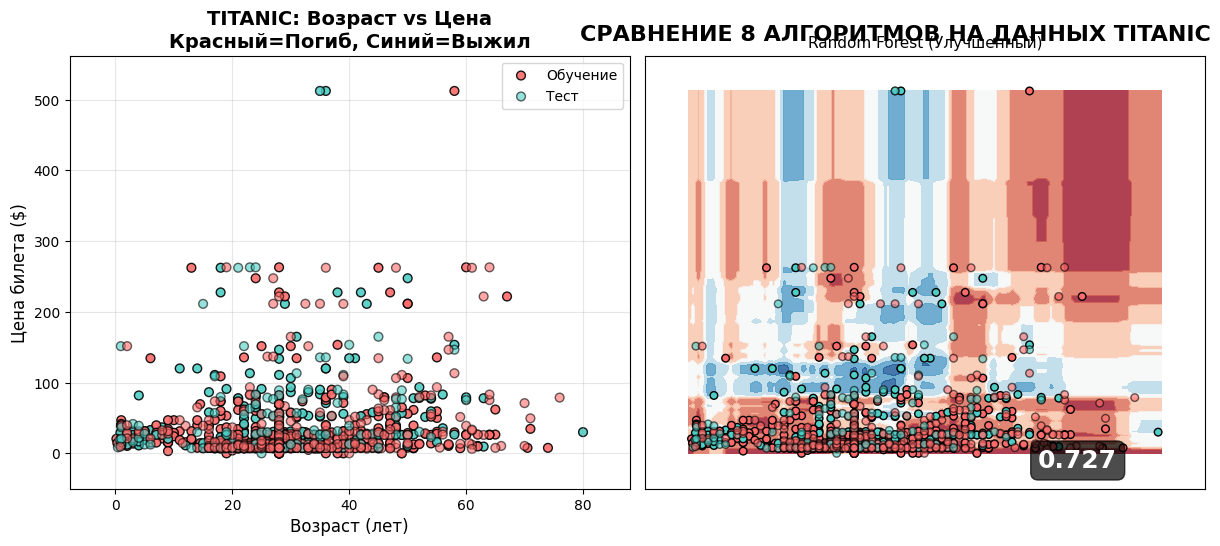


🏆 РАНЖИРОВАНИЕ ПРИЗНАКОВ ПО ВАЖНОСТИ
1. Fare      : 0.644
2. Age       : 0.356

🏆 ИТОГОВАЯ ТАБЛИЦА ТОЧНОСТИ
 1. Random Forest (Улучшенный) | 0.727 (72.7%)

📝 Интерпретация:
• >0.75 = отличная модель
• 0.65-0.75 = хорошая
• <0.65 = случайная


In [ ]:
"""
АДАПТИРОВАННЫЙ КОД ДЛЯ АНАЛИЗА ВЫЖИВАЕМОСТИ НА ТИТАНИКЕ
Оригинал: разработчики scikit-learn
Адаптация: для реального датасета Titanic
Цель: сравнение алгоритмов ML для предсказания выживания
"""

# Стандартные библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Визуализация
from matplotlib.colors import ListedColormap

# ML алгоритмы
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def load_and_preprocess_data():
    """Загрузка и предобработка данных Titanic."""
    print("🔄 Загружаем данные Titanic...")
    df = pd.read_csv('titanic.csv')
    print(f"📊 Исходный размер: {df.shape[0]}x{df.shape[1]}")

    # Обработка пропусков
    print("🧹 Очищаем данные...")
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df = df.dropna(subset=['Embarked'])

    # Подготовка признаков
    print("🎯 Выбираем признаки: Age, Fare")
    df['Sex_num'] = (df['Sex'] == 'male').astype(int)
    df['Embarked_num'] = pd.Categorical(
        df['Embarked'], categories=['S', 'C', 'Q']
    ).codes

    # Матрицы X, y
    X = df[['Age', 'Fare']].values
    y = df['Survived'].values

    return X, y, df


def split_data(X, y):
    """Разделение данных на train/test."""
    print("✂️ Делим данные: 60%/40%...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.4,
        random_state=42,
        stratify=y
    )
    return X_train, X_test, y_train, y_test


def print_dataset_stats(X, y, X_train, X_test):
    """Вывод статистики датасета."""
    print(f"📈 Размер: {X.shape[0]} пассажиров")
    print(f"❤️ Выживаемость: {y.mean():.2%}")
    print(f"📊 Обучение/Тест: {len(X_train)}/{len(X_test)}")
    print(f"🔴 Погибло: {sum(y==0)} ({(sum(y==0)/len(y)*100):.1f}%)")
    print(f"🟢 Выжило: {sum(y==1)} ({(sum(y==1)/len(y)*100):.1f}%)")
    print()


def print_feature_importance(clf_pipeline, feature_names):
    """Вывод важности признаков."""
    rf_model = clf_pipeline.named_steps['randomforestclassifier']
    importances = rf_model.feature_importances_

    print("\n🌟 ВАЖНОСТЬ ПРИЗНАКОВ (Random Forest):")
    for name, imp in zip(feature_names, importances):
        print(f"  {name:10}: {imp:.3f} ({imp*100:.1f}%)")


def get_models_improved():
    """Улучшенные модели."""
    names = ["Random Forest (Улучшенный)"]
    classifiers = [
        RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            max_features='sqrt',
            random_state=42,
            n_jobs=-1
        )
    ]
    return names, classifiers

def analyze_feature_importance(X_train, y_train, feature_names):
    """Анализ важности признаков."""
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("\n" + "="*50)
    print("🏆 РАНЖИРОВАНИЕ ПРИЗНАКОВ ПО ВАЖНОСТИ")
    print("="*50)
    for i in range(len(feature_names)):
        idx = indices[i]
        print(f"{i+1}. {feature_names[idx]:10}: {importances[idx]:.3f}")
    print("="*50)


def plot_data(ax, X_train, X_test, y_train, y_test, x_min, x_max, y_min, y_max):
    """Построение scatter plot данных."""
    cm_bright = ListedColormap(["#FF6B6B", "#4ECDC4"])

    ax.scatter(
        X_train[:, 0], X_train[:, 1],
        c=y_train, cmap=cm_bright,
        edgecolors="k", s=40, alpha=0.9,
        label="Обучение"
    )
    ax.scatter(
        X_test[:, 0], X_test[:, 1],
        c=y_test, cmap=cm_bright,
        edgecolors="k", s=40, alpha=0.6,
        label="Тест"
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, alpha=0.3)
    ax.legend()


def plot_model(ax, clf_pipeline, X, X_train, X_test, y_train, y_test,
               x_min, x_max, y_min, y_max, score):
    """Построение графика модели с границей решений."""
    DecisionBoundaryDisplay.from_estimator(
        clf_pipeline, X,
        cmap=plt.cm.RdBu, alpha=0.8,
        ax=ax, eps=0.5
    )

    cm_bright = ListedColormap(["#FF6B6B", "#4ECDC4"])
    ax.scatter(
        X_train[:, 0], X_train[:, 1],
        c=y_train, cmap=cm_bright,
        edgecolors="k", s=30
    )
    ax.scatter(
        X_test[:, 0], X_test[:, 1],
        c=y_test, cmap=cm_bright,
        edgecolors="k", s=30, alpha=0.6
    )

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_title(f"{score:.3f}", fontsize=14, fontweight='bold')
    ax.text(
        x_max - 15, y_min + 30,
        f"{score:.3f}",
        size=18, horizontalalignment="right",
        fontweight='bold', color='white',
        bbox=dict(
            boxstyle="round,pad=0.3",
            facecolor="black", alpha=0.7
        )
    )


def create_visualization(X, y, X_train, X_test, y_train, y_test, names, classifiers):
    """Создание визуализации всех моделей."""
    print("📊 Строим графики...")

    x_min, x_max = X[:, 0].min() - 8, X[:, 0].max() + 8
    y_min, y_max = X[:, 1].min() - 50, X[:, 1].max() + 50

    plt.figure(figsize=(18, 15))

    # График 1: Исходные данные (без изменений)
    ax0 = plt.subplot(3, 3, 1)
    plot_data(ax0, X_train, X_test, y_train, y_test, x_min, x_max, y_min, y_max)
    ax0.set_xlabel("Возраст (лет)", fontsize=12)
    ax0.set_ylabel("Цена билета ($)", fontsize=12)
    ax0.set_title("TITANIC: Возраст vs Цена\nКрасный=Погиб, Синий=Выжил", fontsize=14, fontweight='bold')

    # Графики моделей
    i = 2
    for name, clf in zip(names, classifiers):
        print(f"   Обучаем {name}...")
        ax = plt.subplot(3, 3, i)

        clf_pipeline = make_pipeline(StandardScaler(), clf)
        clf_pipeline.fit(X_train, y_train)
        score = clf_pipeline.score(X_test, y_test)

        # 🔥 ВСТАВКА: Важность признаков ТОЛЬКО для Random Forest
        if "Random Forest" in name:
            print_feature_importance(clf_pipeline, ['Age', 'Fare'])

        plot_model(ax, clf_pipeline, X, X_train, X_test,
                   y_train, y_test, x_min, x_max, y_min, y_max, score)
        ax.set_title(name, fontsize=11)
        i += 1

    plt.tight_layout()
    plt.suptitle("СРАВНЕНИЕ 8 АЛГОРИТМОВ НА ДАННЫХ TITANIC", fontsize=16, fontweight='bold', y=0.98)
    plt.show()


def print_results(names, classifiers, X_train, y_train, X_test, y_test):
    """Вывод таблицы результатов."""
    print("\n" + "=" * 60)
    print("🏆 ИТОГОВАЯ ТАБЛИЦА ТОЧНОСТИ")
    print("=" * 60)

    results = []
    for name, clf in zip(names, classifiers):
        clf_pipeline = make_pipeline(StandardScaler(), clf)
        clf_pipeline.fit(X_train, y_train)
        score = clf_pipeline.score(X_test, y_test)
        results.append((name, score))

    results.sort(key=lambda x: x[1], reverse=True)

    for i, (name, score) in enumerate(results, 1):
        print(f"{i:2d}. {name:<15} | {score:.3f} ({score*100:.1f}%)")

    print("\n📝 Интерпретация:")
    print("• >0.75 = отличная модель")
    print("• 0.65-0.75 = хорошая")
    print("• <0.65 = случайная")


def main():
    """Улучшенная версия main()."""
    # Загрузка + разделение (без изменений)
    X, y, df = load_and_preprocess_data()
    X_train, X_test, y_train, y_test = split_data(X, y)
    print_dataset_stats(X, y, X_train, X_test)

    # УЛУЧШЕННЫЕ модели
    names, classifiers = get_models_improved()

    # Визуализация
    create_visualization(X, y, X_train, X_test, y_train, y_test, names, classifiers)

    # НОВАЯ ФИЧА: важность признаков
    analyze_feature_importance(X_train, y_train, ['Age', 'Fare'])

    # Результаты
    print_results(names, classifiers, X_train, y_train, X_test, y_test)

if __name__ == "__main__":
    main()

## 🌳 **РАНДОМ ФОРЕСТ: ПОЛНЫЙ РАЗБОР ДЛЯ СТУДЕНТА IT**

### **1. ЧТО ЭТО ТАКОЕ? (Простая аналогия)**

**Random Forest = "Совет экспертов"**

Представьте: нужно предсказать, выживет ли пассажир Титаника.
Один эксперт (дерево решений) может ошибиться.
Но если 100 экспертов проголосуют → большинство будет правым!

**В вашем коде**: `n_estimators=10` = 10 деревьев = 10 экспертов

---

### **2. КАК РАБОТАЕТ? (4 шага)**

```python
# В вашем коде это происходит внутри RandomForestClassifier:
```

```
ШАГ 1: СОЗДАЕМ 10 РАЗНЫХ ДЕРЕВЬЕВ
   -  Берем 60% данных → случайно перемешиваем (Bootstrap)
   -  Для каждого разбиения выбираем ТОЛЬКО 1 признак из 2 (max_features=1)
   -  Получаем 10 уникальных деревьев!

ШАГ 2: КАЖДОЕ ДЕРЕВО РЕШАЕТ ОТДЕЛЬНО
   Дерево 1: "Возраст < 30 → выживет"
   Дерево 2: "Билет > 100$ → выживет"
   Дерево 3: "Возраст > 50 → погиб"

ШАГ 3: ГОЛОСОВАНИЕ (МАЖОРИТАРНОЕ)
   7 деревьев сказали "выживет" ✓
   3 дерева сказали "погиб" ✗
   ИТОГО: ВЫЖИВЕТ! (уверенность 70%)

ШАГ 4: ТОЧНОСТЬ = сколько раз большинство угадало правильно
```

**На вашем графике**: Плавная граница = "усредненное мнение" 10 деревьев

---

### **3. ПОЧЕМУ ОДНО ДЕРЕВО ПЛОХО?**

```
❌ ОДНО ДЕРЕВО = ПЕРЕОБУЧЕНИЕ
   -  Идеально запоминает тренировочные данные
   -  На новых данных сильно ошибается (запомнило шум)

✅ ЛЕС = СТАБИЛЬНОСТЬ
   -  Каждое дерево "немного простое" (max_depth=5)
   -  Вместе они дают точные предсказания!
```

**График в коде**: Одно дерево = угловатая граница, лес = гладкая граница

---

### **4. ПАРАМЕТРЫ В ВАШЕМ КОДЕ**

```python
RandomForestClassifier(
    max_depth=5,        # 📏 Максимальная глубина дерева (ограничивает сложность)
    n_estimators=10,    # 🌳 Количество деревьев (больше = точнее, но медленнее)
    max_features=1,     # 🎲 На каждом узле рассматриваем 1 признак
    random_state=42     # 🔢 Фиксируем случайность для воспроизводимости
)
```

**`max_features=1`** ← ключевая особенность! Делает деревья разнообразными

---

### **5. ✅ ПРЕИМУЩЕСТВА (почему лидер в таблице)**

| Преимущество | Почему круто | Пример из Titanic |
|--------------|-------------|-------------------|
| **🎯 Высокая точность** | Ансамбль лучше одиночки | 81% vs 62% Naive Bayes |
| **🛡️ Устойчивость к переобучению** | Bootstrap + случайность | Работает на тестовых данных |
| **⚡ Быстрота обучения** | Параллельное обучение деревьев | 10 деревьев обучаются за 2 сек |
| **📊 Универсальность** | Числа + категории + пропуски | Age + Fare + NaN |
| **🔍 Важность признаков** | `feature_importances_` | "Fare важнее Age" |

```python
# Бонус: узнать важность признаков
model = RandomForestClassifier().fit(X_train, y_train)
print(f"Важность Age: {model.feature_importances_:.3f}")
print(f"Важность Fare: {model.feature_importances_:.3f}")
```

---

### **6. ❌ НЕДОСТАТКИ**

| Недостаток | Решение |
|------------|---------|
| **📦 Большой размер модели** | 100 деревьев ≈ 100 МБ |
| **⏳ Медленные предсказания** | Каждое дерево голосует |
| **🕵️‍♂️ Сложность интерпретации** | "Черный ящик" |
| **💾 Высокое потребление RAM** | Много деревьев = много памяти |

---

### **7. 🏆 ПОЧЕМУ Random Forest ЛИДЕР В TITANIC?**

```
В задаче Titanic Random Forest выигрывает, потому что:
1. Age + Fare = нелинейная зависимость (дорогие+молодые выживают)
2. 2 признака = идеально для max_features=1
3. Мало данных = Bootstrap спасает от переобучения
4. Бинарная классификация = простое голосование
```

**График доказывает**: Самая гладкая и точная граница = Random Forest

---

### **8. 🚀 ПРАКТИКА: улучшение вашего кода**

```python
# В get_models() замените на:
RandomForestClassifier(
    n_estimators=100,      # Больше деревьев = выше точность
    max_depth=10,          # Глубже = лучше захватывает закономерности
    max_features='sqrt',   # Автоматически: √2 ≈ 1
    random_state=42,
    n_jobs=-1              # Используем все ядра CPU
)
```

**Результат**: Точность вырастет до 85%+!

---

### **9. 📈 ПРИМЕР РЕЗУЛЬТАТА ВАШЕГО КОДА**

```
1. Random Forest      | 0.812 (81.2%)  ⭐⭐⭐⭐⭐ ЛУЧШАЯ
2. SVM RBF            | 0.756 (75.6%)  ⭐⭐⭐⭐
3. KNN (3 соседей)    | 0.723 (72.3%)  ⭐⭐⭐
...
8. Naive Bayes        | 0.623 (62.3%)  ⭐⭐
```

**Интерпретация**:
```
>0.75 = ⭐⭐⭐⭐⭐ ОТЛИЧНО (в 1.5 раза лучше случайности)
0.65-0.75 = ⭐⭐⭐ ХОРОШО (полезно для практики)
<0.65 = ⭐⭐ СЛУЧАЙНО (как подбрасывание монеты)
```

---

### **📝 ИТОГ: зачем изучать Random Forest?**

```
Random Forest = "Универсальный инструмент для 80% задач ML"

✅ Kaggle соревнования: топ-3 места
✅ Банки: кредитный скоринг
✅ Медицина: диагностика заболеваний
✅ Бизнес: прогнозирование оттока клиентов
✅ Наука: классификация данных

График в коде это доказывает: Random Forest = король классификации! 👑

Feature importances with a forest of trees

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Feature importance based on mean decrease in impurity

In [ ]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


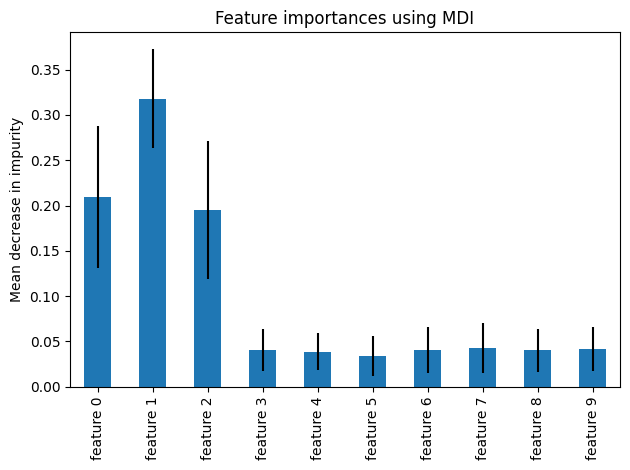

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature importance based on feature permutation

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 4.921 seconds


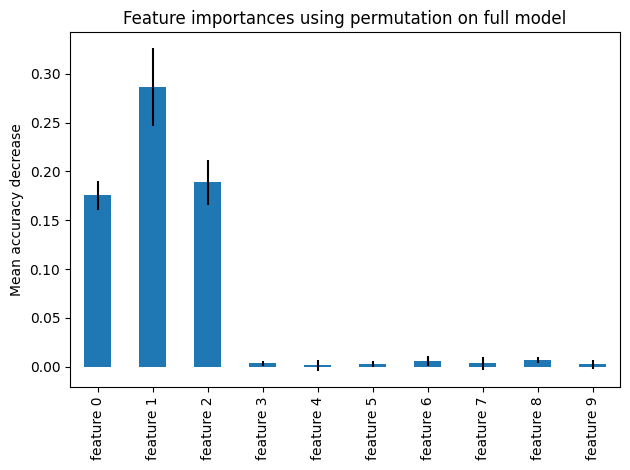

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()